<a href="https://colab.research.google.com/github/swagata87/IITKanpurPhy654/blob/main/Ising_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Related Nature publication
https://www.nature.com/articles/nphys4035

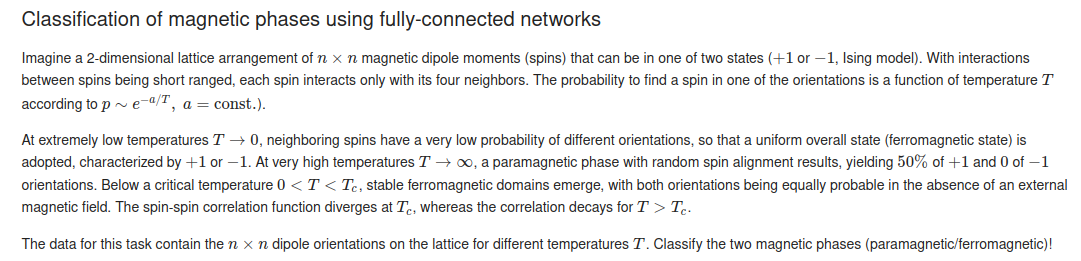

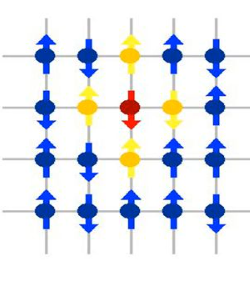

In [1]:
from tensorflow import keras
import numpy as np
#callbacks = keras.callbacks
layers = keras.layers

import gdown

url = "https://swmukher.web.cern.ch/swmukher/ising_data.npz"
output = 'ising_data.npz'
gdown.download(url, output, quiet=True)
f = np.load(output, allow_pickle=True)
f


NpzFile 'ising_data.npz' with keys: C, T

In [2]:
np.shape(f['C'])

(26000, 32, 32)

In [3]:
#np.shape(f['T'])
f['T']

array([3.1, 1.8, 1. , ..., 1.7, 3.5, 2.5])

In [4]:
n_train = 20000

x_train, x_test = f["C"][:n_train], f["C"][n_train:] # spin in 2D array
T_train, T_test = f["T"][:n_train], f["T"][n_train:] # temp

In [5]:
np.shape(x_train)

(20000, 32, 32)

In [6]:
np.shape(x_test)

(6000, 32, 32)

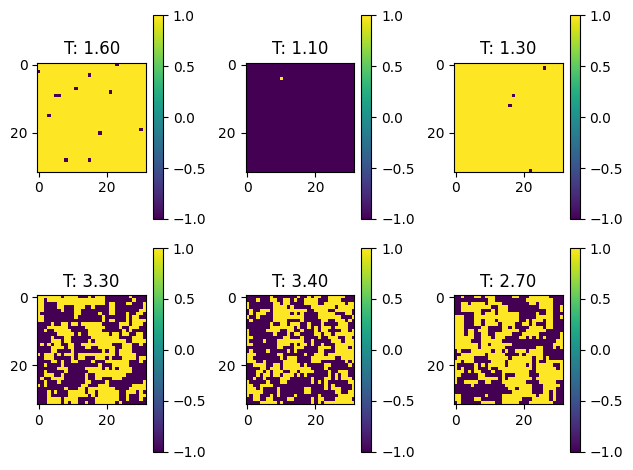

In [32]:
import matplotlib.pyplot as plt

for i,j in enumerate(np.random.choice(n_train, 6)):
    plt.subplot(2,3,i+1)
    image = x_train[j]
    plot = plt.imshow(image)
    plt.title("T: %.2f" % T_train[j])
    plt.colorbar()


plt.tight_layout()
plt.show()

In [30]:
n=np.where((T_train>2.2) & (T_train<2.21))[0]
np.shape(n)

(777,)

In [9]:
np.where((T_train>2.2) & (T_train<2.3))[0]

array([   36,   115,   126,   150,   165,   170,   176,   261,   272,
         284,   288,   409,   410,   424,   499,   504,   515,   519,
         524,   545,   572,   593,   601,   606,   610,   662,   664,
         720,   729,   752,   765,   773,   780,   797,   819,   843,
         907,   942,   957,  1016,  1074,  1124,  1187,  1228,  1239,
        1245,  1252,  1256,  1267,  1296,  1314,  1341,  1355,  1358,
        1378,  1379,  1406,  1407,  1416,  1442,  1465,  1472,  1608,
        1634,  1643,  1728,  1733,  1771,  1831,  1836,  1893,  1989,
        2020,  2054,  2167,  2171,  2208,  2213,  2239,  2259,  2300,
        2301,  2330,  2368,  2383,  2412,  2422,  2427,  2451,  2455,
        2476,  2478,  2487,  2584,  2639,  2642,  2658,  2659,  2698,
        2723,  2776,  2829,  2909,  2910,  2914,  2918,  2961,  2985,
        2986,  2996,  3020,  3034,  3040,  3064,  3077,  3096,  3111,
        3134,  3190,  3215,  3228,  3232,  3284,  3301,  3334,  3340,
        3363,  3432,

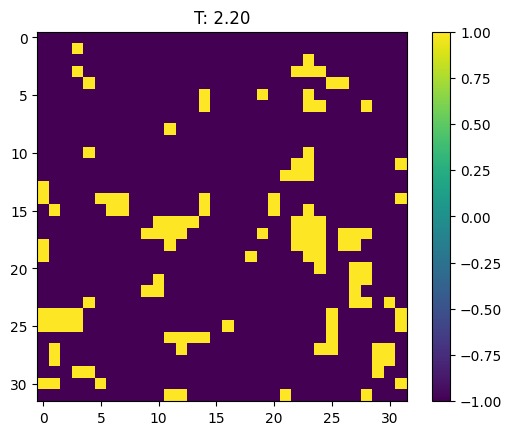

In [31]:
j=7091
image = x_train[j]
plot = plt.imshow(image)
plt.title("T: %.2f" % T_train[j])
plt.colorbar()
plt.show()

Text(0, 0.5, 'number of entries')

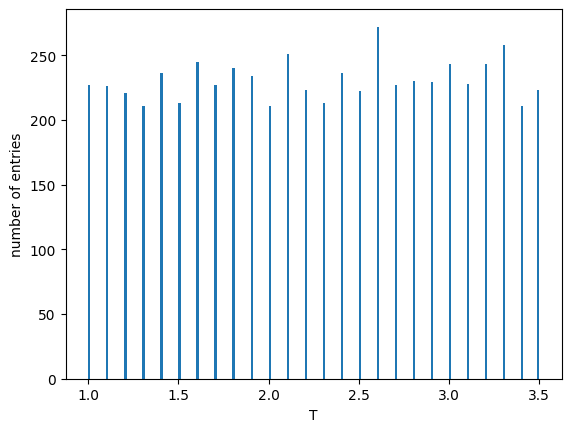

In [11]:
plt.hist(T_test, bins=200)
plt.xlabel("T")
plt.ylabel("number of entries")

In [12]:
Tc = 2.27
y_train = T_train > Tc
np.shape(y_train)

(20000,)

In [13]:
y_train

array([ True, False, False, ..., False,  True,  True])

In [14]:
y_test = T_test > Tc


In [15]:
y_test

array([False, False,  True, ..., False,  True,  True])

In [16]:
model = keras.models.Sequential()
model.add(layers.InputLayer(input_shape=(32, 32, 1)))
model.add(layers.Reshape((1024,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │          16,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,689 (65.19 KB)

 Trainable params: 16,689 (65.19 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(0.001),
    metrics=['accuracy'])

In [18]:
results = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=50,
                    verbose=2,
                    validation_split=0.1,
                    #callbacks=[
                     #   callbacks.EarlyStopping(patience=5, verbose=1),
                      #  callbacks.ReduceLROnPlateau(factor=0.67, patience=2, verbose=1)]
                    )


Epoch 1/50
282/282 - 7s - 24ms/step - accuracy: 0.8334 - loss: 0.3534 - val_accuracy: 0.9610 - val_loss: 0.1319
Epoch 2/50
282/282 - 1s - 5ms/step - accuracy: 0.9156 - loss: 0.2175 - val_accuracy: 0.9730 - val_loss: 0.1078
Epoch 3/50
282/282 - 2s - 7ms/step - accuracy: 0.9299 - loss: 0.1871 - val_accuracy: 0.9695 - val_loss: 0.1020
Epoch 4/50
282/282 - 1s - 5ms/step - accuracy: 0.9361 - loss: 0.1659 - val_accuracy: 0.9735 - val_loss: 0.1171
Epoch 5/50
282/282 - 1s - 4ms/step - accuracy: 0.9427 - loss: 0.1580 - val_accuracy: 0.9760 - val_loss: 0.1134
Epoch 6/50
282/282 - 1s - 4ms/step - accuracy: 0.9421 - loss: 0.1442 - val_accuracy: 0.9750 - val_loss: 0.1056
Epoch 7/50
282/282 - 1s - 5ms/step - accuracy: 0.9464 - loss: 0.1332 - val_accuracy: 0.9710 - val_loss: 0.1322
Epoch 8/50
282/282 - 1s - 3ms/step - accuracy: 0.9491 - loss: 0.1312 - val_accuracy: 0.9730 - val_loss: 0.0872
Epoch 9/50
282/282 - 1s - 3ms/step - accuracy: 0.9506 - loss: 0.1236 - val_accuracy: 0.9695 - val_loss: 0.1183


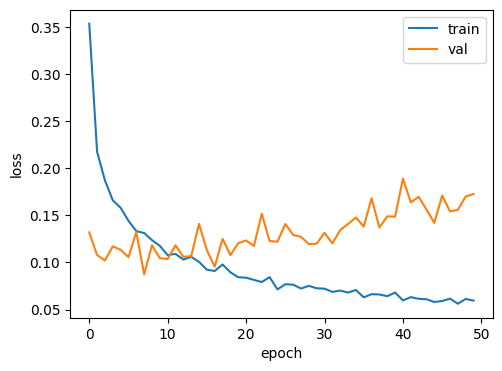

In [19]:
plt.figure(1, (12, 4))
plt.subplot(1, 2, 1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

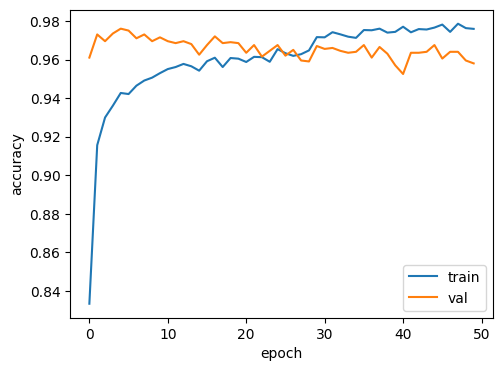

In [20]:
plt.figure(1, (12, 4))
plt.subplot(1, 2, 1)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

In [21]:
a = model.evaluate(x_test, y_test, verbose=0)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


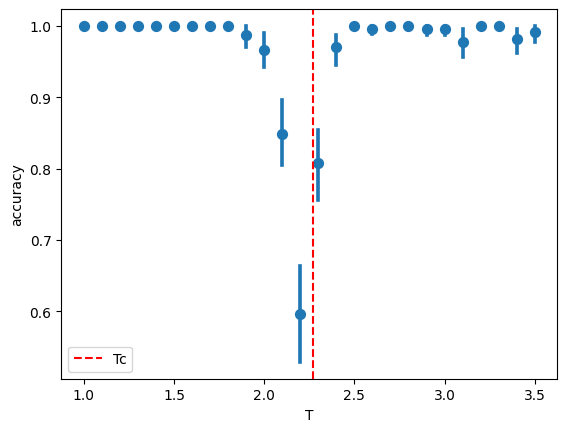

In [22]:
import seaborn as sns

preds = model.predict(x_test).round().squeeze()
acc = (preds == y_test)

ax = sns.regplot(x=T_test, y=acc, x_estimator= np.mean, fit_reg=False)
ax.set_ylabel("accuracy")
ax.set_xlabel("T")
plt.axvline(x=Tc, color='red', linestyle='--', label='Tc')
plt.legend(loc="lower left")

In [23]:
preds

array([0., 0., 1., ..., 0., 1., 1.], dtype=float32)

In [24]:
model.predict(x_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[1.8673095e-01],
       [8.7707199e-04],
       [9.0681243e-01],
       ...,
       [3.3777307e-03],
       [9.8337364e-01],
       [9.7055185e-01]], dtype=float32)

In [25]:
model.predict(x_test).round()

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [26]:
model.predict(x_test).round().squeeze()

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([0., 0., 1., ..., 0., 1., 1.], dtype=float32)

In [27]:
y_test

array([False, False,  True, ..., False,  True,  True])

In [28]:
print (acc)

[ True  True  True ...  True  True  True]
